## 用CNN圖形辨識 - Convolutional Neural Network

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# 由 Keras 讀入 MNIST
from keras.datasets import mnist

#CNN
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

# something userful
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
print("Training data : %d , with size %d x %d" %x_train.shape)
print("Testing  data : %d , with size %d x %d" %x_test.shape)

Training data : 60000 , with size 28 x 28
Testing  data : 10000 , with size 28 x 28


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

# CNN 要的是 (28, 28, 1)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [8]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_train[1234].shape

(28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
X = x_train[1234]

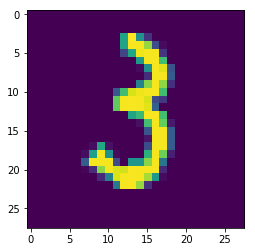

In [13]:
X = X.reshape(28, 28)
plt.imshow(X)

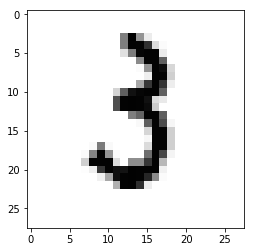

In [14]:
plt.imshow(X , cmap='Greys')

將資料先進行正規化處理，資料線性單位化至[0,1]

In [15]:
x_train_normalization = ( x_train - x_train.min() ) / ( x_train.max() - x_train.min() )#[NCTS]DavidChi
x_test_normalization = ( x_test - x_test.min() ) / ( x_test.max() - x_test.min() )

In [16]:
x_train_normalization.max(), x_train_normalization.min()

(1.0, 0.0)

In [17]:
x_test_normalization.max(), x_test_normalization.min()

(1.0, 0.0)

## 輸出格式處理，用 1-hot 方式處理。

In [18]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 建構神經網路

## 【Model 1】打開一個空白的神經網路。

In [20]:
model_01 = Sequential()

## 【Convolution】
Conv2D(4,(5,5))
Conv2D : Conv 矩陣
Filter : 4 個
Size : 5 X 5

In [21]:
model_01.add(Conv2D(4,(5,5), padding='same',input_shape=(28, 28, 1)))
model_01.add(Activation('relu'))

## 【MAX-Pooling】

In [22]:
model_01.add(MaxPool2D(pool_size=(2,2)))

## 【Convolution】第二次

In [23]:
model_01.add(Conv2D(8,(5,5), padding='same'))
model_01.add(Activation('relu'))

## 【MAX-Pooling】第二次

In [24]:
model_01.add(MaxPool2D(pool_size=(2,2)))

## 【Convolution】第三次

In [25]:
model_01.add(Conv2D(16,(5,5), padding='same'))
model_01.add(Activation('relu'))

## 【MAX-Pooling】第三次

In [26]:
model_01.add(MaxPool2D(pool_size=(2,2)))

送進一般的神經網路，並拉平

In [27]:
model_01.add(Flatten())
model_01.add(Dense(9))
model_01.add(Activation('relu'))

In [28]:
model_01.add(Dense(10))
model_01.add(Activation('softmax'))

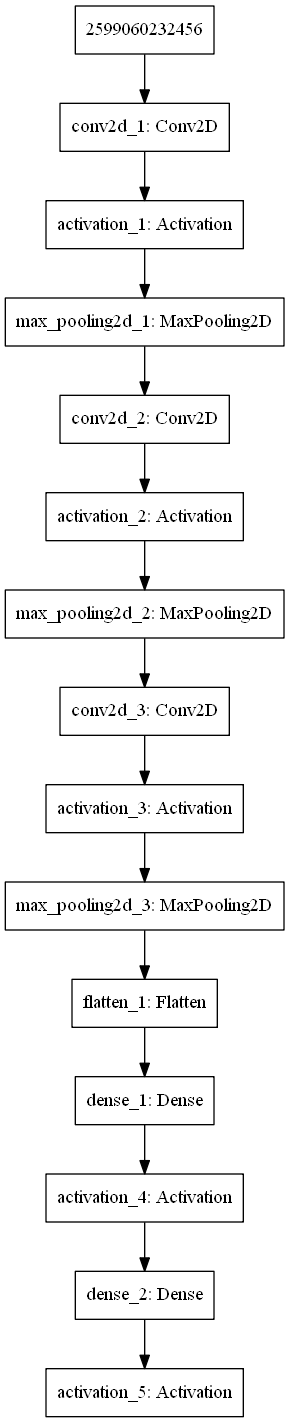

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model_01, to_file='Q9-1_CNN_model_01.png')
from IPython.display import Image
Image(filename="Q9-1_CNN_model_01.png")

## 【Compile & Training】

In [30]:
model_01.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['acc'])
model_01_result = model_01.fit(x_train_normalization, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test_normalization, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 491us/step - loss: 0.0510 - acc: 0.9827 - val_loss: 0.0170 - val_acc: 0.9943
Epoch 2/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0163 - val_acc: 0.9949
Epoch 3/20
60000/60000 [==============================] - 35s 580us/step - loss: 0.0156 - acc: 0.9949 - val_loss: 0.0209 - val_acc: 0.9936
Epoch 4/20
60000/60000 [==============================] - 39s 656us/step - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0133 - val_acc: 0.9959
Epoch 5/20
60000/60000 [==============================] - 44s 734us/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0166 - val_acc: 0.9951
Epoch 6/20
60000/60000 [==============================] - 50s 833us/step - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0131 - val_acc: 0.9961
Epoch 7/20
60000/60000 [==============================] - 55s 915us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 0.

In [31]:
model_01.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

## 【Model 2】 kernel_size : 5 X 5 ---> 3 X 3

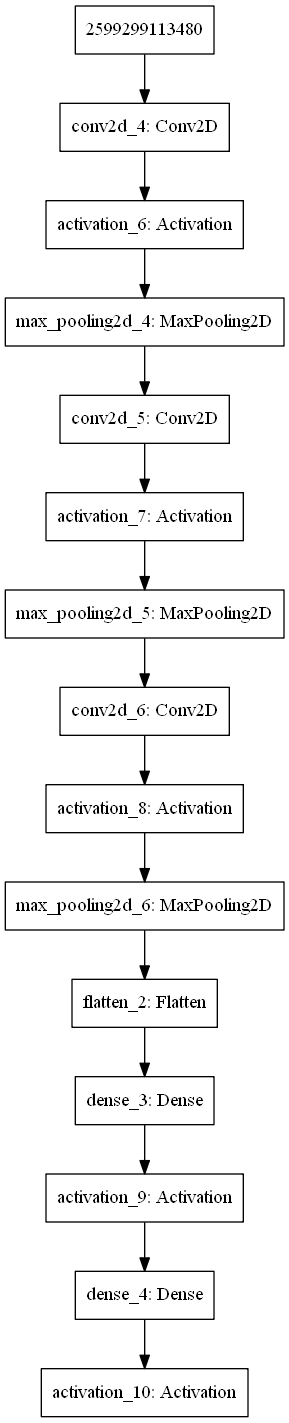

In [32]:
model_02 = Sequential()
#【Convolution】
#Conv2D(4,(3,3)) Conv2D : Conv 矩陣 Filter : 4 個 Size : 3 X 3

model_02.add(Conv2D(4,(3,3), padding='same',input_shape=(28, 28, 1)))
model_02.add(Activation('relu'))

#【MAX-Pooling】
model_02.add(MaxPool2D(pool_size=(2,2)))
#【Convolution】第二次
model_02.add(Conv2D(8,(3,3), padding='same'))
model_02.add(Activation('relu'))
#【MAX-Pooling】第二次
model_02.add(MaxPool2D(pool_size=(2,2)))
#【Convolution】第三次
model_02.add(Conv2D(16,(3,3), padding='same'))
model_02.add(Activation('relu'))

#【MAX-Pooling】第三次
model_02.add(MaxPool2D(pool_size=(2,2)))

#送進一般的神經網路，並拉平

model_02.add(Flatten())
model_02.add(Dense(9))
model_02.add(Activation('relu'))
model_02.add(Dense(10))
model_02.add(Activation('softmax'))

plot_model(model_02, to_file='Q9-1_CNN_model_02.png')
Image(filename="Q9-1_CNN_model_02.png")

In [33]:
model_02.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['acc'])
model_02_result = model_02.fit(x_train_normalization, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test_normalization, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0469 - acc: 0.9839 - val_loss: 0.0205 - val_acc: 0.9928
Epoch 2/20
60000/60000 [==============================] - 24s 404us/step - loss: 0.0188 - acc: 0.9936 - val_loss: 0.0160 - val_acc: 0.9946
Epoch 3/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0152 - acc: 0.9949 - val_loss: 0.0175 - val_acc: 0.9939
Epoch 4/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.0138 - acc: 0.9953 - val_loss: 0.0102 - val_acc: 0.9966
Epoch 5/20
60000/60000 [==============================] - 26s 437us/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0120 - val_acc: 0.9960
Epoch 6/20
60000/60000 [==============================] - 27s 450us/step - loss: 0.0124 - acc: 0.9958 - val_loss: 0.0140 - val_acc: 0.9951
Epoch 7/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.0125 - acc: 0.9959 - val_loss: 0.

In [34]:
model_02.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          1168      
__________

## 【Model 3】kernel_size : 5 X 5 ---> 3 X 3，filter : 4:8:16 ---> 2:4:8

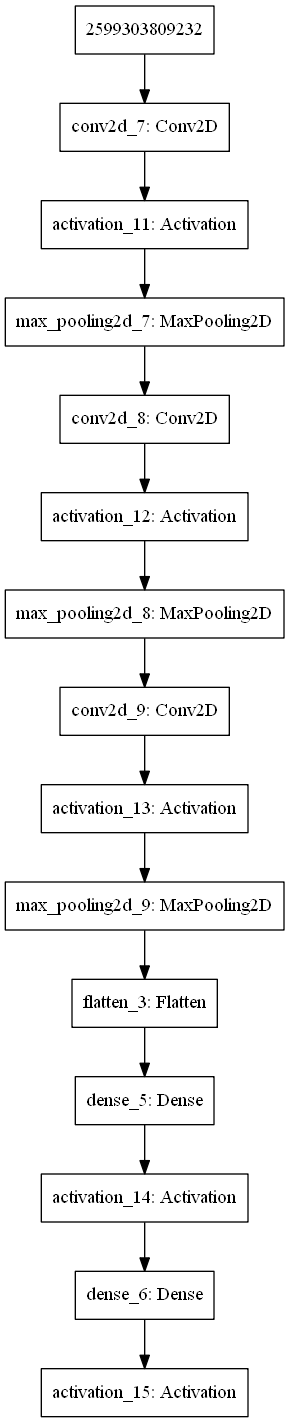

In [35]:
model_03 = Sequential()
#【Convolution】
#Conv2D(4,(3,3)) Conv2D : Conv 矩陣 Filter : 4 個 Size : 3 X 3

model_03.add(Conv2D(2,(3,3), padding='same',input_shape=(28, 28, 1)))
model_03.add(Activation('relu'))

#【MAX-Pooling】
model_03.add(MaxPool2D(pool_size=(2,2)))
#【Convolution】第二次
model_03.add(Conv2D(4,(3,3), padding='same'))
model_03.add(Activation('relu'))
#【MAX-Pooling】第二次
model_03.add(MaxPool2D(pool_size=(2,2)))
#【Convolution】第三次
model_03.add(Conv2D(8,(3,3), padding='same'))
model_03.add(Activation('relu'))

#【MAX-Pooling】第三次
model_03.add(MaxPool2D(pool_size=(2,2)))

#送進一般的神經網路，並拉平

model_03.add(Flatten())
model_03.add(Dense(9))
model_03.add(Activation('relu'))
model_03.add(Dense(10))
model_03.add(Activation('softmax'))

plot_model(model_03, to_file='Q9-1_CNN_model_03.png')
Image(filename="Q9-1_CNN_model_03.png")

In [36]:
model_03.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['acc'])
model_03_result = model_03.fit(x_train_normalization, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test_normalization, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 347us/step - loss: 0.0710 - acc: 0.9747 - val_loss: 0.0332 - val_acc: 0.9886
Epoch 2/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.0323 - acc: 0.9887 - val_loss: 0.0249 - val_acc: 0.9914
Epoch 3/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0280 - acc: 0.9904 - val_loss: 0.0250 - val_acc: 0.9915
Epoch 4/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0259 - acc: 0.9910 - val_loss: 0.0269 - val_acc: 0.9906
Epoch 5/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0245 - acc: 0.9917 - val_loss: 0.0213 - val_acc: 0.9928
Epoch 6/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0241 - acc: 0.9917 - val_loss: 0.0188 - val_acc: 0.9938
Epoch 7/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.0239 - acc: 0.9916 - val_loss: 0.

In [42]:
model_03.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 2)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 4)         76        
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 4)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           296       
__________

In [43]:
predict_01 = np.argmax(model_01.predict(x_test_normalization), axis = 1)
score_01 = model_01.evaluate(x_test_normalization, y_test)
print('model_01 loss',score_01[0])
print('model_01 正確率',score_01[1] * 100 ,'%')

predict_02 = np.argmax(model_02.predict(x_test_normalization), axis = 1)
score_02 = model_02.evaluate(x_test_normalization, y_test)
print('model_02 loss',score_02[0])
print('model_02 正確率',score_02[1] * 100 ,'%')

predict_03 = np.argmax(model_03.predict(x_test_normalization), axis = 1)
score_03 = model_03.evaluate(x_test_normalization, y_test)
print('model_03 loss',score_03[0])
print('model_03 正確率',score_03[1] * 100 ,'%')

10000/10000 [==============================] - 2s 230us/step
model_01 loss 0.010743498829554301
model_01 正確率 99.70999956130981 %
10000/10000 [==============================] - 1s 140us/step
model_02 loss 0.013202754397422542
model_02 正確率 99.55799976348877 %
10000/10000 [==============================] - 2s 176us/step
model_03 loss 0.02350081151998602
model_03 正確率 99.24099981307984 %


model_01 神經網路判斷為: 3
model_02 神經網路判斷為: 3
model_03 神經網路判斷為: 3


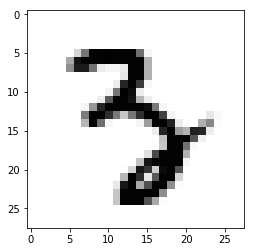

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [44]:
predict_01 = model_01.predict_classes(x_test_normalization)
predict_02 = model_02.predict_classes(x_test_normalization)
predict_03 = model_03.predict_classes(x_test_normalization)

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap = 'Greys')
    print('model_01 神經網路判斷為:',predict_01[測試編號])
    print('model_02 神經網路判斷為:',predict_02[測試編號])
    print('model_03 神經網路判斷為:',predict_03[測試編號])

test(87)

interact_manual(test,測試編號 = (0,9999))

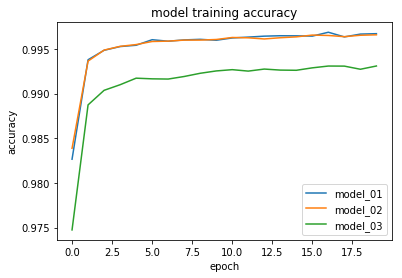

In [45]:
plt.plot(model_01_result.history['acc'])
plt.plot(model_02_result.history['acc'])
plt.plot(model_03_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_01','model_02','model_03'],loc = 'best')
plt.show()

In [46]:
model_json = model_01.to_json()
open('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_01_DavidChi.json', 'w').write(model_json)
model_01.save_weights('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_01_DavidChi.h5')

model_json = model_02.to_json()
open('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_02_DavidChi.json', 'w').write(model_json)
model_02.save_weights('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_02_DavidChi.h5')

model_json = model_03.to_json()
open('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_03_DavidChi.json', 'w').write(model_json)
model_03.save_weights('[NCTS]_Homework_Q9-1_Convolutional_Neural_Network_Model_03_DavidChi.h5')